In [1]:
import pandas as pd
data = pd.read_csv("brain_tumor_dataset.csv")
data

,Patient_ID,Age,Gender,Tumor_Type,Tumor_Size,Location,Histology,Stage,Symptom_1,Symptom_2,Symptom_3,Radiation_Treatment,Surgery_Performed,Chemotherapy,Survival_Rate,Tumor_Growth_Rate,Family_History,MRI_Result,Follow_Up_Required
0,1,73,Male,Malignant,5.375612,Temporal,Astrocytoma,III,Vision Issues,Seizures,Seizures,No,No,No,51.312579,0.111876,No,Positive,Yes
1,2,26,Male,Benign,4.847098,Parietal,Glioblastoma,II,Headache,Headache,Nausea,Yes,Yes,Yes,46.373273,2.165736,Yes,Positive,Yes
2,3,31,Male,Benign,5.588391,Parietal,Meningioma,I,Vision Issues,Headache,Seizures,No,No,No,47.072221,1.884228,No,Negative,No
3,4,29,Male,Malignant,1.436600,Temporal,Medulloblastoma,IV,Vision Issues,Seizures,Headache,Yes,No,Yes,51.853634,1.283342,Yes,Negative,No
4,5,54,Female,Benign,2.417506,Parietal,Glioblastoma,I,Headache,Headache,Seizures,No,No,Yes,54.708987,2.069477,No,Positive,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19995,19996,21,Male,Malignant,9.612013,Parietal,Medulloblastoma,III,Seizures,Nausea,Vision Issues,No,No,Yes,58.229662,0.353806,No,Negative,Yes
19996,19997,32,Female,Benign,1.543560,Temporal,Meningioma,III,Headache,Headache,Vision Issues,Yes,Yes,No,77.706856,2.341074,No,Positive,No
19997,19998,57,Female,Benign,3.618634,Temporal,Medulloblastoma,I,Seizures,Vision Issues,Nausea,No,No,Yes,89.543803,2.332881,No,Positive,Yes
19998,19999,68,Male,Malignant,8.519086,Parietal,Glioblastoma,III,Seizures,Headache,Vision Issues,Yes,Yes,Yes,83.306781,2.387202,No,Positive,No


In [2]:
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn.decomposition import PCA as RandomizedPCA
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
import seaborn as sns
from sklearn.metrics import confusion_matrix
from skopt import BayesSearchCV
from skopt.space import Real
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import roc_auc_score, make_scorer, classification_report, confusion_matrix

In [3]:
svc = SVC(kernel='linear', class_weight='balanced',random_state = 42)
model = make_pipeline(svc)


In [4]:
y = data["Tumor_Type"]
X = data.drop(columns=["Tumor_Type","Patient_ID"])
X = pd.get_dummies(X, drop_first=True) 
X

,Age,Tumor_Size,Survival_Rate,Tumor_Growth_Rate,Gender_Male,Location_Occipital,Location_Parietal,Location_Temporal,Histology_Glioblastoma,Histology_Medulloblastoma,...,Symptom_2_Vision Issues,Symptom_3_Nausea,Symptom_3_Seizures,Symptom_3_Vision Issues,Radiation_Treatment_Yes,Surgery_Performed_Yes,Chemotherapy_Yes,Family_History_Yes,MRI_Result_Positive,Follow_Up_Required_Yes
0,73,5.375612,51.312579,0.111876,True,False,False,True,False,False,...,False,False,True,False,False,False,False,False,True,True
1,26,4.847098,46.373273,2.165736,True,False,True,False,True,False,...,False,True,False,False,True,True,True,True,True,True
2,31,5.588391,47.072221,1.884228,True,False,True,False,False,False,...,False,False,True,False,False,False,False,False,False,False
3,29,1.436600,51.853634,1.283342,True,False,False,True,False,True,...,False,False,False,False,True,False,True,True,False,False
4,54,2.417506,54.708987,2.069477,False,False,True,False,True,False,...,False,False,True,False,False,False,True,False,True,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19995,21,9.612013,58.229662,0.353806,True,False,True,False,False,True,...,False,False,False,True,False,False,True,False,False,True
19996,32,1.543560,77.706856,2.341074,False,False,False,True,False,False,...,False,False,False,True,True,True,False,False,True,False
19997,57,3.618634,89.543803,2.332881,False,False,False,True,False,True,...,True,True,False,False,False,False,True,False,True,True
19998,68,8.519086,83.306781,2.387202,True,False,True,False,True,False,...,False,False,False,True,True,True,True,False,True,False


In [5]:
from sklearn.model_selection import train_test_split
Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, test_size=0.2, random_state=42)

In [6]:
cv = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)

# AUC OVR con decision_function
auc_scorer = make_scorer(roc_auc_score, needs_threshold=True, multi_class="ovr")

# Espacio de búsqueda para RBF: C y gamma en log
search_spaces = {
    "svc__C": Real(1e-6, 1e3, prior="log-uniform")
}

opt = BayesSearchCV(
    estimator=model,          # tu pipeline pca -> svc
    search_spaces=search_spaces,
    scoring=auc_scorer,
    cv=cv,
    n_iter=30,                # sube si quieres más precisión
    random_state=42,
    refit=True,               # re-entrena con el mejor set
)

opt.fit(Xtrain[:100], ytrain[:100])
print("Mejores params (CV):", opt.best_params_)
print("Mejor AUC CV:", opt.best_score_)

Mejores params (CV): OrderedDict([('svc__C', 0.07773697006110111)])
Mejor AUC CV: 0.43050000000000005


AUC en test: 0.5072696413566931
              precision    recall  f1-score   support

      Benign       0.50      0.49      0.50      1997
   Malignant       0.50      0.50      0.50      2003

    accuracy                           0.50      4000
   macro avg       0.50      0.50      0.50      4000
weighted avg       0.50      0.50      0.50      4000



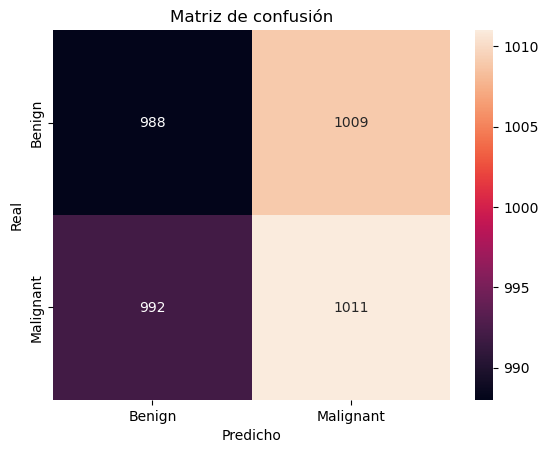

In [7]:
best_model = opt.best_estimator_

# AUC en test
test_scores = best_model.decision_function(Xtest)
test_auc = roc_auc_score(ytest, test_scores, multi_class="ovr")
print("AUC en test:", test_auc)


ypred = best_model.predict(Xtest)
print(classification_report(ytest, ypred))

cm = confusion_matrix(ytest, ypred, labels=best_model.classes_)

import seaborn as sns, matplotlib.pyplot as plt
sns.heatmap(cm, annot=True, fmt="d",
            xticklabels=best_model.classes_,
            yticklabels=best_model.classes_)
plt.xlabel("Predicho"); plt.ylabel("Real"); plt.title("Matriz de confusión")
plt.show()
